***
<br><br>
<h1>CLV: Individual value for all customers (CLV individual por cliente)</h1>
<em>Customer Intelligence</em><br><br>

Author: Daniel Torres - Data Scientist <br>

<br><br>
***

#### Overview
Calculate the monetary value of each customer throughout his life, understanding that his life is the time he spends as a customer in a given company.



##### Spanish
Calcular el valor monetario de cada cliente en el lapso de su vida, entendiendo que su vida es el tiempo de permanencia como cliente en una empresa determinada. 

 

<br><br>

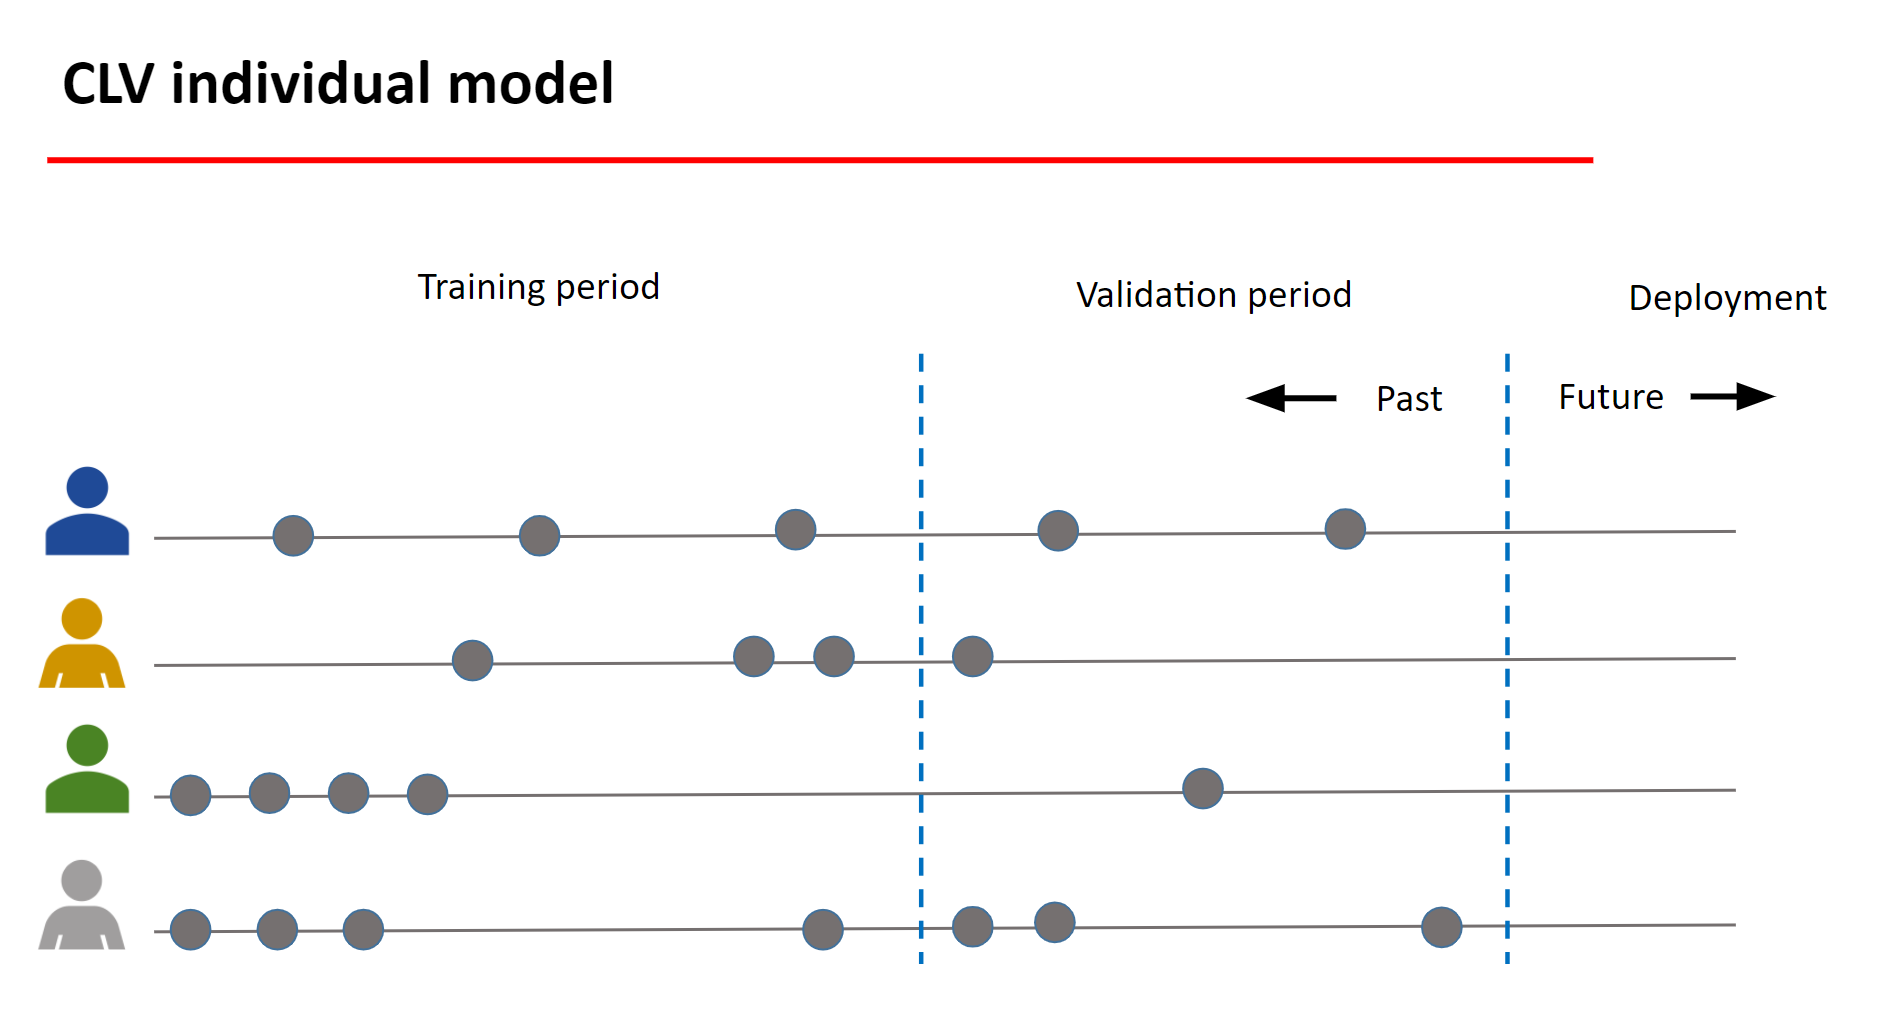

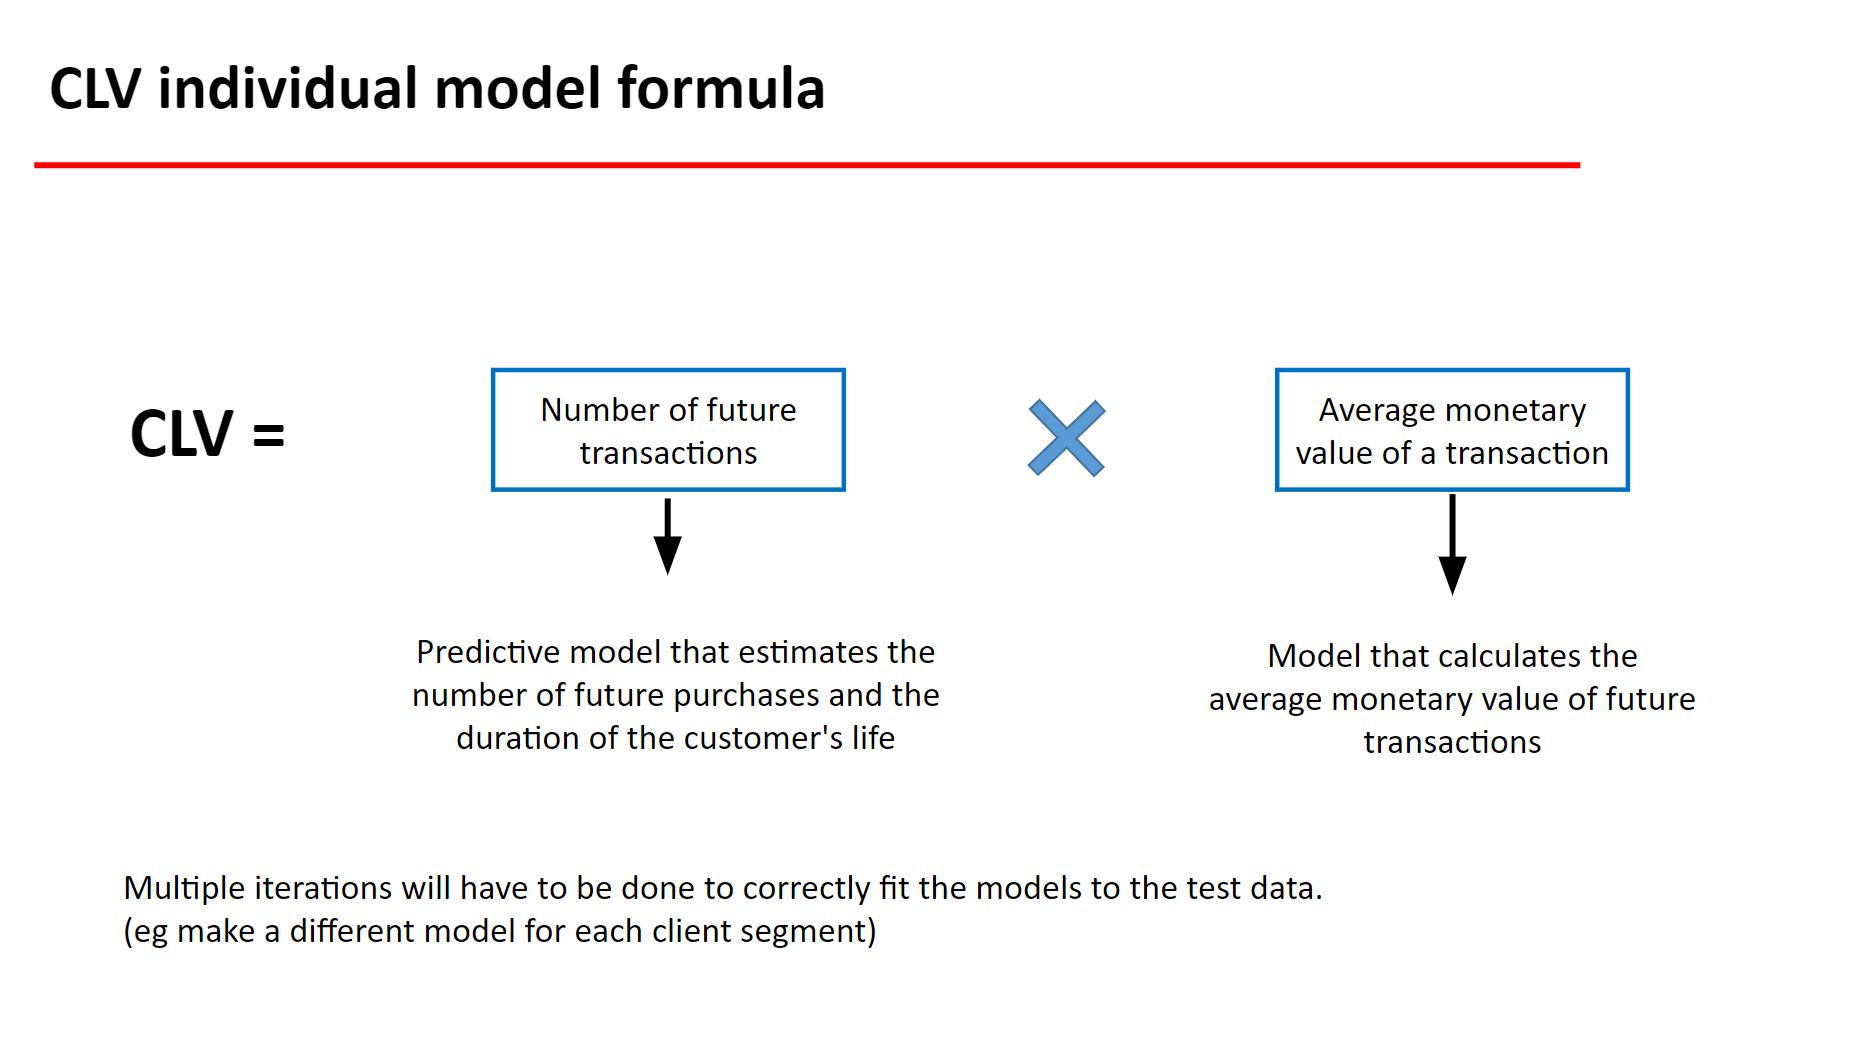

In [2]:
from IPython.display import Image, display

list_images = ['CLV1.png',
                    'CLV2.png']

for image_name in list_images:
    display(Image(filename=image_name))

In [3]:
#from IPython.display import Image
#Image(filename='CLV1.png') 

In [1]:
# Importing the necesary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.cloud import bigquery
from pandas.io import gbq
import pickle
import time
import warnings
warnings.filterwarnings('ignore')
from itertools import product
from tqdm import tqdm_notebook
from datetime import datetime, timedelta

In [2]:
# Setting the ETL function

def ETL_process(query, ndf):#, f_ini, f_fin):
    print('La data se extraerá desde el {} hasta el {}')#.format(f_ini, f_fin))
    # Definir parámetros
    location = 'US'
    project = 'pe-project1-gcp'
    # Establecer conexión a Big query
    client = bigquery.Client(location = location, project = project)
    print("Se ha establecido la conexión a bigquery para el proyecto {}".format(client.project))
    # Configura para leer data por lotes y así evitar la expulsión por time out
    job_config = bigquery.QueryJobConfig(priority = bigquery.QueryPriority.BATCH) # para jalar mas de 50MM
    # Query para obtener la dara
    query = query#.format(f_ini, f_fin)
    print('Extrayendo la data...')
    # Extraer la data
    query_job = client.query(query, location=location, job_config=job_config)
    # Chequear el progreso de la extracción. Una vez que termine, los datos ya han sido leídos.
    query_job = client.get_job(query_job.job_id, location=location)

    # Convertir a un dataframe de pandas la data leída.
    rows = query_job.result()
    df = gbq.read_gbq(query, project_id=project)
    print('Guardando data ...')
    df.to_csv('Data/{}.dat'.format(ndf), index = False)
    return df

In [3]:
# SQL query with the name of the table we'll extract

query = """ SELECT * FROM DS_ANALYTICS.dtc_tabla_CLV_TT_18_19"""

In [29]:
# Extracting the data

%%time
df_result = ETL_process(query, 'results_11_MM_INT')    
df_result.head()

La data se extraerá desde el {} hasta el {}
Se ha establecido la conexión a bigquery para el proyecto pe-farm-peruanas-gcp
Extrayendo la data...
Guardando data ...
CPU times: user 16min 27s, sys: 31.6 s, total: 16min 58s
Wall time: 33min 7s


,CLIENTE_ID,COMPRA_1,ULTIMA_COMP,TRX,VENTA,COSTO,UNIDADES,COMPRA_1_2019,ULTIMA_COMP_2019,TRX_2019,VENTA_2019,COSTO_2019,INT_abr_20
0,0I60C606,2018-01-04,2018-12-29,58,1282.559322,1048.478213334,158,2019-01-10,2019-12-29,70.0,2758.728814,1962.219666668,CUIDADO PERSONAL
1,E806GIEG,2018-01-06,2018-12-28,70,5886.050847,4683.156567620,302,2019-01-15,2019-12-26,35.0,2696.338983,1573.918393334,BEBÉ
2,0E64I8G6,2018-01-03,2018-12-27,76,5610.186441,5698.767479998,200,2019-01-12,2019-12-27,35.0,3679.474576,4010.786861538,CUIDADO FAMILIAR
3,8060242C,2018-01-02,2018-12-31,56,7833.559322,6184.554826666,180,2019-01-07,2019-12-31,67.0,8617.169492,7480.173014284,ADULTO MAYOR
4,2C804E4G,2018-01-12,2018-12-24,47,1135.169492,644.851188236,144,2019-01-06,2019-12-26,68.0,2134.745763,1302.603126056,FARMA


In [4]:
#Creating a dataframe df

df=pd.read_csv('Data/results_11_MM_INT.dat')

In [5]:
df['MARGEN']=df['VENTA']-df['COSTO']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055268 entries, 0 to 11055267
Data columns (total 14 columns):
 #   Column            Dtype  
---  ------            -----  
 0   CLIENTE_ID        object 
 1   COMPRA_1          object 
 2   ULTIMA_COMP       object 
 3   TRX               int64  
 4   VENTA             float64
 5   COSTO             float64
 6   UNIDADES          int64  
 7   COMPRA_1_2019     object 
 8   ULTIMA_COMP_2019  object 
 9   TRX_2019          float64
 10  VENTA_2019        float64
 11  COSTO_2019        float64
 12  INT_abr_20        object 
 13  MARGEN            float64
dtypes: float64(6), int64(2), object(6)
memory usage: 1.2+ GB


In [6]:
# Importing additional packages

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [7]:
df.isnull().sum()

CLIENTE_ID                0
COMPRA_1                  0
ULTIMA_COMP               0
TRX                       0
VENTA                     0
COSTO                   680
UNIDADES                  0
COMPRA_1_2019       1837306
ULTIMA_COMP_2019    1837306
TRX_2019            1837306
VENTA_2019          1837306
COSTO_2019          1837696
INT_abr_20              681
MARGEN                  680
dtype: int64

In [8]:
df.sort_values(by=['VENTA'], ascending=False).head()

,CLIENTE_ID,COMPRA_1,ULTIMA_COMP,TRX,VENTA,COSTO,UNIDADES,COMPRA_1_2019,ULTIMA_COMP_2019,TRX_2019,VENTA_2019,COSTO_2019,INT_abr_20,MARGEN
10106375,E6640AIA,2018-01-01,2018-12-31,1168,422993.882712,508541.520380,7440,2019-01-02,2019-12-31,793.0,242631.361017,265596.745811,FAMILIA CON BEBÉ,-85547.637669
10089113,04AA6G0I,2018-01-02,2018-12-27,243,421959.749153,373667.829383,4992,2019-01-02,2019-12-30,272.0,360608.938983,315353.549342,ADULTO MAYOR,48291.919769
7740294,86222806,2018-01-02,2018-12-30,1553,343539.797288,441774.280432,5310,2019-01-04,2019-12-23,416.0,65652.089153,73554.067347,FAMILIA CON BEBÉ,-98234.483144
5654178,0I608E0E,2018-01-03,2018-12-31,613,340008.384746,281230.747217,4336,2019-01-02,2019-12-31,565.0,323449.121356,262644.085014,ADULTO MAYOR,58777.637529
4486006,EE4E8AIC,2018-01-06,2018-12-31,661,319512.457627,393781.311056,4572,2019-01-02,2019-12-31,528.0,309627.694915,345797.797171,CUIDADO FAMILIAR,-74268.853429


In [9]:
# Replacing nan with 0

df=df.fillna(0).reset_index(drop=True)

In [10]:
df.isnull().sum()

CLIENTE_ID          0
COMPRA_1            0
ULTIMA_COMP         0
TRX                 0
VENTA               0
COSTO               0
UNIDADES            0
COMPRA_1_2019       0
ULTIMA_COMP_2019    0
TRX_2019            0
VENTA_2019          0
COSTO_2019          0
INT_abr_20          0
MARGEN              0
dtype: int64

In [11]:
df["VENTA"] = pd.to_numeric(df["VENTA"])
df["COSTO"] = pd.to_numeric(df["COSTO"])
df["TRX"] = pd.to_numeric(df["TRX"])

df["VENTA_2019"] = pd.to_numeric(df["VENTA_2019"])
df["COSTO_2019"] = pd.to_numeric(df["COSTO_2019"])
df["TRX_2019"] = pd.to_numeric(df["TRX_2019"])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055268 entries, 0 to 11055267
Data columns (total 14 columns):
 #   Column            Dtype  
---  ------            -----  
 0   CLIENTE_ID        object 
 1   COMPRA_1          object 
 2   ULTIMA_COMP       object 
 3   TRX               int64  
 4   VENTA             float64
 5   COSTO             float64
 6   UNIDADES          int64  
 7   COMPRA_1_2019     object 
 8   ULTIMA_COMP_2019  object 
 9   TRX_2019          float64
 10  VENTA_2019        float64
 11  COSTO_2019        float64
 12  INT_abr_20        object 
 13  MARGEN            float64
dtypes: float64(6), int64(2), object(6)
memory usage: 1.2+ GB


In [12]:
# Adding the Variation Coefficient to the describe table
# Agregando el Coeficiente de variación a la tabla describe

df_describe=df.describe().round(2)
describe_T=df_describe.T
describe_T['CV']=describe_T['std']/describe_T['mean']
df_describe=describe_T.T
df_describe.round(2)

,TRX,VENTA,COSTO,UNIDADES,TRX_2019,VENTA_2019,COSTO_2019,MARGEN
count,11055268.00,11055268.00,11055268.00,11055268.00,11055268.00,11055268.00,11055268.00,11055268.00
mean,13.17,665.49,478.53,46.08,12.59,640.87,452.73,186.96
std,21.49,1526.47,1331.32,84.04,21.08,1508.87,1242.54,399.68
min,1.00,-0.00,-171.25,2.00,0.00,0.00,-728.66,-98234.48
25%,2.00,71.69,37.60,8.00,1.00,30.98,13.69,19.69
50%,6.00,229.69,138.37,20.00,6.00,195.97,114.39,72.58
75%,16.00,670.08,440.44,54.00,16.00,651.49,420.06,208.71
max,3698.00,422993.88,508541.52,16156.00,2921.00,360608.94,345797.80,118349.31
CV,1.63,2.29,2.78,1.82,1.67,2.35,2.74,2.14


In [13]:
# CV in TRX is more stable (Interquartile Range Rule) small: 1.5 extreme: 3.0
# CV en TRX es mas estable (Interquartile Range Rule) leve:1.5   extremo:3.0

IQR=df_describe.loc['75%','TRX']-df_describe.loc['25%','TRX']
limite_superior_trx=df_describe.loc['75%','TRX']+1.5*IQR
print(limite_superior_trx)

IQR=df_describe.loc['75%','VENTA']-df_describe.loc['25%','VENTA']
limite_superior_venta=df_describe.loc['75%','VENTA']+1.5*IQR
print(limite_superior_venta)

37.0
1567.6650000000002


In [14]:
no_usar=['CLIENTE_ID', 'COMPRA_1', 'ULTIMA_COMP','VENTA', 'COSTO', 'COMPRA_1_2019', 'ULTIMA_COMP_2019', 'VENTA_2019', 'COSTO_2019','INT_abr_20']

lista_1=[x for x in df.columns if x not in no_usar]

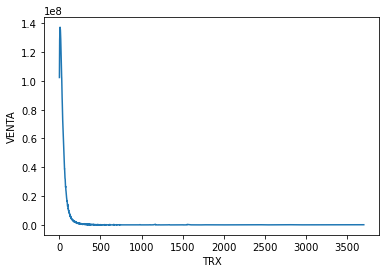

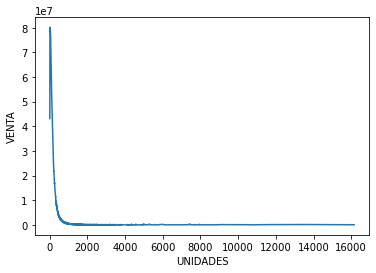

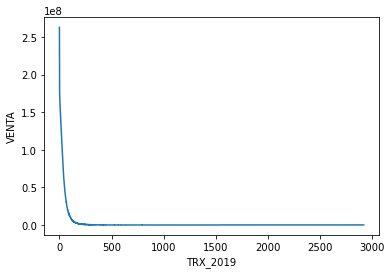

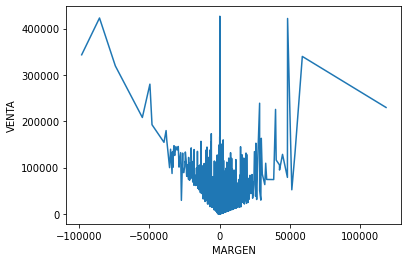

In [41]:
for i in lista_1:
    df_pivot=pd.pivot_table(data=df, index=i, values='VENTA', aggfunc='sum')
    sns.lineplot(data=df_pivot, x=i, y="VENTA")
    plt.show()

<AxesSubplot:>

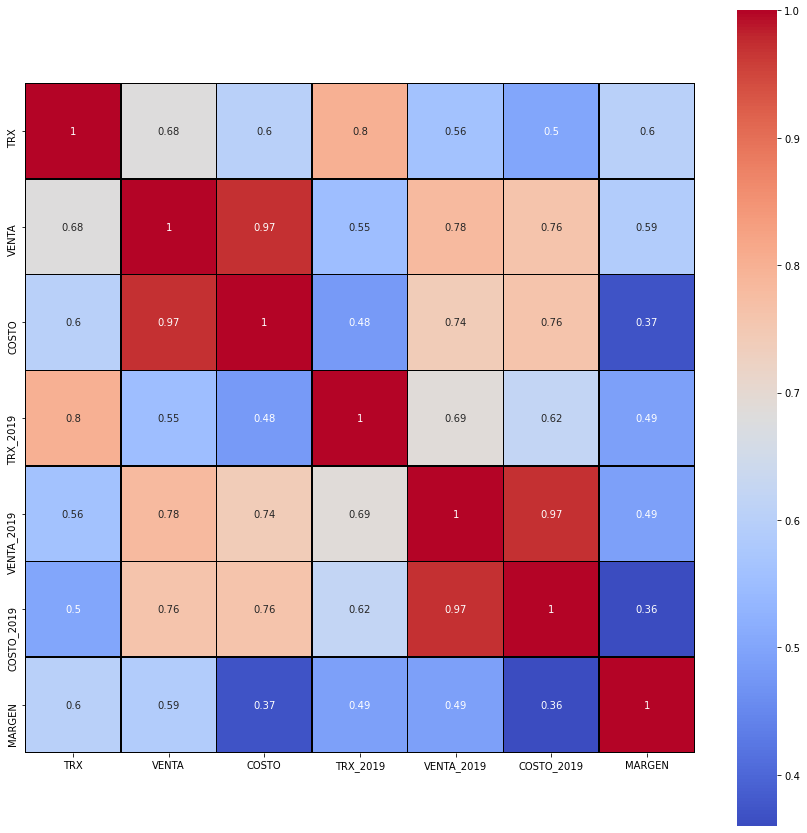

In [42]:
df_plots = df.drop(['CLIENTE_ID','UNIDADES', 'COMPRA_1', 'ULTIMA_COMP','COMPRA_1_2019', 'ULTIMA_COMP_2019'], axis = 1)

fig, ax = plt.subplots(figsize=(15,15))

heatmap_1 = df_plots.corr().round(2)

sns.heatmap(heatmap_1,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5)

<br><br>
***


# CLV Individual Model

***

## Forecast of future transactions


<strong>Assumption 1: </strong> While a client is active, the number of transactions made by the client follows a Poisson distribution with a ratio λ (λ is the number of transactions expected in a given time interval)

<strong>Assumption 2: </strong> The heterogeneity in the transaction ratio (λ) follows a Gamma distribution. This means that each client has its own probability in each number of transactions and it is independent from that of the other clients.

<strong>Assumption 3: </strong> After each transaction the customer will leave the company with probability p and will remain alive with probability (1-p). The moment in which the client abandons is distributed among the transactions according to a Geometric distribution.

<strong>Assumption 4: </strong> The heterogeneity in the probability of dying/dropping out (p) follows a Beta distribution. This means that each client has its own probability of being alive and it is independent from that of the other clients.

<strong>Assumption 5: </strong> The probability of dying/abandoning (p) and the transaction ratio (λ) vary independently among clients.


<br><br><br>

### Spanish


<strong>Supuesto 1: </strong> Mientras un cliente este activo, el numero de transacciones hechas por el cliente sigue una distribución Poisson con un ratio λ (λ es el numero de transacciones esperadas en un determinado intervalo de tiempo)

<strong>Supuesto 2: </strong> La heterogeniedad en el ratio de transacciones (λ) sigue una distribucion Gama. Esto quiere decir que cada cliente tiene su propia probabilidad en cada numero de transacciones y es independiente a la de los demas clientes. 

<strong>Supuesto 3: </strong> Después de cada transacción el cliente abandonará a la empresa con una probabilidad p y seguirá vivo con una probabilidad (1-p). El momento en el que el cliente abandona se distribuye entre las transacciones de acuerdo a una distribución Geométrica. 

<strong>Supuesto 4: </strong> La heterogeniedad en la probabilidad de morir/abandonar (p)  sigue una distribucion Beta. Esto quiere decir que cada cliente tiene su propia probabilidad de estar vivo y es independiente a la de los demas clientes. 

<strong>Supuesto 5: </strong> La probabilidad de morir/abandonar (p) y el ratio de transacciones (λ) varían de forma independiente entre los clientes. 

<br><br>

In [16]:
# Importing the necessary packages
# Importando los paquetes necesarios

import pandas as pd
import numpy as np
from lifetimes.utils import *
from lifetimes import BetaGeoFitter
from lifetimes import ParetoNBDFitter
from lifetimes.plotting import plot_probability_alive_matrix, plot_frequency_recency_matrix
from lifetimes.generate_data import beta_geometric_nbd_model
import matplotlib.pyplot as plt
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases, plot_period_transactions,plot_history_alive
from datetime import datetime, timedelta


from lifetimes.plotting import plot_frequency_recency_matrix

In [17]:
# Standardizing the sale and cost format
# Estandarizando el formato de venta y costo

df["COMPRA_1"]    = pd.to_datetime(df["COMPRA_1"])
df["ULTIMA_COMP"] = pd.to_datetime(df["ULTIMA_COMP"])

df["TRX"]   = pd.to_numeric(df["TRX"])
df["VENTA"] = pd.to_numeric(df["VENTA"])
df["COSTO"] = pd.to_numeric(df["COSTO"])

In [18]:
# Creating DB with Recency, frequency and T
# recency: is the time that elapses between the first and last transaction
# T: time that elapses between the first transaction and the final day of the evaluation period
# t-recency= the recency of the RFMM model

# Creando BD con Recencia, frecuencia y T
# recencia: es el tiempo que transcurre entre la primera y ultima transacción 
# T: tiempo que transcurre entre la primera transacción y el dia final del periodo de evaluación 
# t-recencia= la recencia del modelo RFMM

df_modelo1=pd.DataFrame(df['CLIENTE_ID'])
hoy= datetime(2019,1,1)

df_modelo1["recencia"]   = [int(i.days) for i in (df.ULTIMA_COMP - df.COMPRA_1)]
df_modelo1["frecuencia"] = df['TRX'] - 1 #todas las compras menos la primera
df_modelo1["T"]          = [int(i.days) for i in (hoy - df.COMPRA_1)]
df_modelo1["venta_prom"] = df['VENTA']/df['TRX']

df_modelo1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055268 entries, 0 to 11055267
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   CLIENTE_ID  object 
 1   recencia    int64  
 2   frecuencia  int64  
 3   T           int64  
 4   venta_prom  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 421.7+ MB


In [47]:
# Adjusting the model
# Ajustando el modelo

bgf = BetaGeoFitter(penalizer_coef=0.001)
bgf.fit(df_modelo1['frecuencia'], df_modelo1['recencia'], df_modelo1['T'])

bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,0.688121,0.000326,0.687483,0.688759
alpha,15.922888,0.009856,15.903571,15.942205
a,0.049632,0.000096,0.049443,0.049821
b,1.180032,0.003138,1.173882,1.186182


In [ ]:
plot_period_transactions(bgf)

<AxesSubplot:title={'center':'Expected Number of Future Purchases for 1 Unit of Time,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

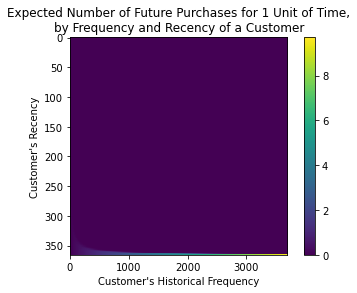

In [49]:
plot_frequency_recency_matrix(bgf)

<AxesSubplot:title={'center':'Probability Customer is Alive,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

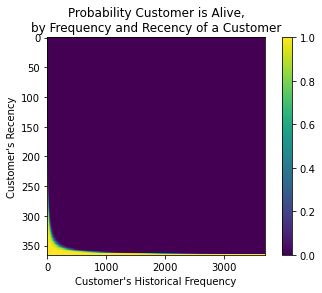

In [50]:
plot_probability_alive_matrix(bgf)

***
***
***
### Calculating the probability of remaining being a customer  
<br>

In [51]:
# Calculating the probability of remaining being a customer
# Calculando la probabilidad de seguir siendo un cliente 

df_prediccion=df_modelo1

df_prediccion['prob_estar_vivo']=bgf.conditional_probability_alive(df_modelo1['frecuencia'], 
                                                                   df_modelo1['recencia'], 
                                                                   df_modelo1['T'])
df_prediccion.head()

,CLIENTE_ID,recencia,frecuencia,T,venta_prom,prob_estar_vivo
0,0I60C606,359,57,362,22.113092,0.998627
1,E806GIEG,356,69,360,84.086441,0.998490
2,0E64I8G6,358,75,363,73.818243,0.998199
3,8060242C,363,55,364,139.884988,0.998959
4,2C804E4G,346,46,354,24.152542,0.997026


In [52]:
# Estimation of the number of transactions carried out in a period of time t
# Estimación de la cantidad de transacciones realizadas en un periodo de tiempo t

t=365   #transacciones esperadas para un año de 365 días
df_modelo1['trx_futuras']=round(bgf.conditional_expected_number_of_purchases_up_to_time(t,df_modelo1['frecuencia'], 
                                                                                       df_modelo1['recencia'], 
                                                                                       df_modelo1['T']),2)
df_modelo1.sort_values(by='trx_futuras', ascending=False)

,CLIENTE_ID,recencia,frecuencia,T,venta_prom,prob_estar_vivo,trx_futuras
2220378,02468ACE,364,3697,365,34.762867,8.173508e-01,2842.93
3336918,EAEA4040,364,2947,365,20.472286,9.624306e-01,2668.56
1113057,4I4I4I4I,364,2807,365,46.814054,9.724178e-01,2568.20
10005246,48484848,364,2656,365,35.657148,9.802422e-01,2449.63
1122347,0E66E424,364,2535,365,17.703486,9.848680e-01,2349.09
...,...,...,...,...,...,...,...
8575138,4CC4G2CA,29,6,355,11.295400,9.192086e-05,0.00
6736319,40CE6604,127,27,239,37.264528,6.028972e-05,0.00
5691357,0GC8868I,198,38,363,8.001304,1.905739e-07,0.00
5551666,0ECAEA0E,242,41,363,102.387006,9.003879e-05,0.00


<br><br><br><br>
***

## Prediction of the average monetary value of future transactions


<strong>Assumption 1: </strong> The monetary value of a given future transaction varies randomly around the average value of past transactions.

<strong>Assumption 2: </strong> The average value of transactions varies between clients but is maintained over time for the same client.

<strong>Assumption 3: </strong> The distribution of the average value of transactions between clients is independent of the transaction process. There should be no correlation between frequency and monetary value.

<br><br><br>
### Spanish

#### Predicción del valor monetario promedio de las transacciones futuras

<strong>Supuesto 1: </strong> El valor monetario de una determinada transacción futura varía aleatoriamente alrededor del valor promedio de las transacciones pasadas. 

<strong>Supuesto 2: </strong> El valor promedio de las transacciones varia entre clientes pero se mantienen en el tiempo para el mismo cliente. 

<strong>Supuesto 3: </strong> La distribución del valor promnedio de las transacciones entre clientes es independiente al proceso de la transacción. No debe haber correlación entre frecuencia y valor monetario. 

<br><br><br>

In [53]:
# Checking Assumption 3
# Comprobando el supuesto 3

df_modelo2=df_modelo1[df_modelo1['frecuencia']>0][df_modelo1['venta_prom']>0] #eliminando frecuencia y margen <= 0
df_modelo2[['frecuencia','venta_prom']].corr()

,frecuencia,venta_prom
frecuencia,1.0000,0.0306
venta_prom,0.0306,1.0000


In [54]:
# Modeling Monetary Value Using the Gamma-Gama Model
# Modelando el valor monetario usando el modelo Gama-Gama

import lifetimes

ggf=lifetimes.GammaGammaFitter(penalizer_coef=0.001)
ggf.fit(df_modelo2['frecuencia'], df_modelo2['venta_prom'])

<lifetimes.GammaGammaFitter: fitted with 9115901 subjects, p: 6.58, q: 1.66, v: 6.80>

In [55]:
ggf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
p,6.579197,0.003853,6.571646,6.586748
q,1.661918,0.000731,1.660484,1.663351
v,6.802884,0.004265,6.794525,6.811244


In [56]:
# Calculating the average expected margin based on the adjusted ggf with the data
# Calculando el margen promedio esperado en base al ggf ajustado con la data 

df_modelo2['venta_prom_esperado']=ggf.conditional_expected_average_profit(df_modelo2['frecuencia'],
                                                                           df_modelo2['venta_prom'])

In [57]:
print(f"Avg venta              : {df_modelo2['venta_prom'].mean()}")
print(f"Avg venta_prom_esperado: {df_modelo2['venta_prom_esperado'].mean()}")

Avg venta              : 48.633115422284526
Avg venta_prom_esperado: 49.13156063171557


In [58]:
# Calculating the CLV using the ggf
# Calculando el CLV usando el ggf

df_modelo2['CLV_estimado'] = ggf.customer_lifetime_value(bgf,
                                                         df_modelo2['frecuencia'],
                                                         df_modelo2['recencia'],
                                                         df_modelo2['T'],
                                                         df_modelo2['venta_prom'],
                                                         time=12,              # cálculo para 12 meses 
                                                         freq='D',             # mis datos estan en días
                                                         discount_rate=0.01    # WACC de 12% aprox (1.01^12)-1                                                        
                                                        )

In [59]:
# Manual calculation of CLV
# Cálculo manual de CLV

df_modelo2['CLV_manual'] = df_modelo2['trx_futuras'] * df_modelo2['venta_prom_esperado'] 

df_modelo2.head()

,CLIENTE_ID,recencia,frecuencia,T,venta_prom,prob_estar_vivo,trx_futuras,venta_prom_esperado,CLV_estimado,CLV_manual
0,0I60C606,359,57,362,22.113092,0.998627,54.61,22.193268,1121.703754,1211.974390
1,E806GIEG,356,69,360,84.086441,0.998490,66.30,84.062463,5158.829646,5573.341312
2,0E64I8G6,358,75,363,73.818243,0.998199,71.43,73.809936,4879.862035,5272.243764
3,8060242C,363,55,364,139.884988,0.998959,52.46,139.753036,6785.440346,7331.444279
4,2C804E4G,346,46,354,24.152542,0.997026,45.06,24.247399,1011.321782,1092.587804


In [60]:
# creating a table to do the merge
# creando tabla para hacer el merge

df_to_merge = pd.DataFrame(df['CLIENTE_ID'])
df_to_merge['VENTA_2019'] = df['VENTA_2019']
df_to_merge['TRX_2019'] = df['TRX_2019']
df_to_merge.head()

,CLIENTE_ID,VENTA_2019,TRX_2019
0,0I60C606,2758.728814,70.0
1,E806GIEG,2696.338983,35.0
2,0E64I8G6,3679.474576,35.0
3,8060242C,8617.169492,67.0
4,2C804E4G,2134.745763,68.0


In [61]:
df_estimado_VS_real = pd.merge(df_modelo2, 
                      df_to_merge, 
                      on ='CLIENTE_ID', 
                      how ='left')

df_estimado_VS_real.head()

,CLIENTE_ID,recencia,frecuencia,T,venta_prom,prob_estar_vivo,trx_futuras,venta_prom_esperado,CLV_estimado,CLV_manual,VENTA_2019,TRX_2019
0,0I60C606,359,57,362,22.113092,0.998627,54.61,22.193268,1121.703754,1211.974390,2758.728814,70.0
1,E806GIEG,356,69,360,84.086441,0.998490,66.30,84.062463,5158.829646,5573.341312,2696.338983,35.0
2,0E64I8G6,358,75,363,73.818243,0.998199,71.43,73.809936,4879.862035,5272.243764,3679.474576,35.0
3,8060242C,363,55,364,139.884988,0.998959,52.46,139.753036,6785.440346,7331.444279,8617.169492,67.0
4,2C804E4G,346,46,354,24.152542,0.997026,45.06,24.247399,1011.321782,1092.587804,2134.745763,68.0


In [62]:
print(df_estimado_VS_real[['CLV_estimado', 'CLV_manual', 'VENTA_2019']].corr().round(2))
print(df_estimado_VS_real[['frecuencia', 'trx_futuras', 'TRX_2019']].corr().round(2))

              CLV_estimado  CLV_manual  VENTA_2019
CLV_estimado          1.00        1.00        0.77
CLV_manual            1.00        1.00        0.77
VENTA_2019            0.77        0.77        1.00
             frecuencia  trx_futuras  TRX_2019
frecuencia         1.00         0.96      0.79
trx_futuras        0.96         1.00      0.80
TRX_2019           0.79         0.80      1.00


<br><br><br>
***
## Comparing Actual vs. Estimated
(Comparando Real vs Estimada)
***
<br><br>

In [103]:
print(df_estimado_VS_real[['CLV_estimado']].sum())
print(df_estimado_VS_real[['CLV_manual']].sum())
df_estimado_VS_real[['VENTA_2019']].sum()

CLV_estimado    5.274279e+09
dtype: float64
CLV_manual    5.697735e+09
dtype: float64


VENTA_2019    5.745942e+09
dtype: float64

In [69]:
# Average sales
# Venta Promedio

df_estimado_VS_real[['frecuencia','CLV_manual','CLV_estimado' ,'VENTA_2019']].groupby('frecuencia').mean().round()

,CLV_manual,CLV_estimado,VENTA_2019
frecuencia,,,
1,140.0,129.0,153.0
2,181.0,167.0,200.0
3,220.0,204.0,244.0
4,260.0,241.0,289.0
5,301.0,279.0,332.0
...,...,...,...
2535,41592.0,38496.0,31144.0
2656,87350.0,80848.0,69369.0
2807,120230.0,111280.0,120641.0


In [71]:
# FREQUENCY
# FRECUENCIA

exp_FRECUENCIA=df_estimado_VS_real[['frecuencia','CLV_manual','CLV_estimado' ,'VENTA_2019']].groupby('frecuencia').sum().round()
exp_FRECUENCIA.to_csv('exp_FRECUENCIA.csv', index=True)  #True porque quiero ver la columna de frecuencia
df_estimado_VS_real.groupby('frecuencia').size().to_csv('exp_cliente_frec.csv', index=True)
exp_FRECUENCIA

,CLV_manual,CLV_estimado,VENTA_2019
frecuencia,,,
1,166230309.0,153950246.0,181453471.0
2,156267109.0,144694286.0,173179144.0
3,150771452.0,139591203.0,166969147.0
4,147026641.0,136115061.0,163300588.0
5,145484185.0,134681574.0,160389360.0
...,...,...,...
2535,41592.0,38496.0,31144.0
2656,87350.0,80848.0,69369.0
2807,120230.0,111280.0,120641.0


In [65]:
# RECENCY
# RECENCIA

exp_RECENCIA=df_estimado_VS_real[['recencia','CLV_manual', 'CLV_estimado','VENTA_2019']].groupby('recencia').sum().round()
exp_RECENCIA.to_csv('exp_RECENCIA.csv', index=True)  #True porque quiero ver la columna de RECENCIA
exp_RECENCIA

,CLV_manual,CLV_estimado,VENTA_2019
recencia,,,
0,29219042.0,27071860.0,17054945.0
1,6568350.0,6085260.0,4471765.0
2,5267174.0,4879742.0,3691764.0
3,4488581.0,4158586.0,3117696.0
4,3940159.0,3650354.0,2844606.0
...,...,...,...
360,202577818.0,187499240.0,192204118.0
361,199191389.0,184365226.0,186648205.0
362,183589213.0,169924246.0,171703114.0


***
***
<br><br>

# Table without outliers
(Tabla sin outliers)

<br>

In [19]:
# Calculating the coefficient of variation
# Calculando el coeficiente de variación

df_describe=df.describe().round(2)
describe_T=df_describe.T
describe_T['CV']=describe_T['std']/describe_T['mean']
df_describe=describe_T.T
df_describe.round(2)

,TRX,VENTA,COSTO,UNIDADES,TRX_2019,VENTA_2019,COSTO_2019,MARGEN
count,11055268.00,11055268.00,11055268.00,11055268.00,11055268.00,11055268.00,11055268.00,11055268.00
mean,13.17,665.49,478.53,46.08,12.59,640.87,452.73,186.96
std,21.49,1526.47,1331.32,84.04,21.08,1508.87,1242.54,399.68
min,1.00,-0.00,-171.25,2.00,0.00,0.00,-728.66,-98234.48
25%,2.00,71.69,37.60,8.00,1.00,30.98,13.69,19.69
50%,6.00,229.69,138.37,20.00,6.00,195.97,114.39,72.58
75%,16.00,670.08,440.44,54.00,16.00,651.49,420.06,208.71
max,3698.00,422993.88,508541.52,16156.00,2921.00,360608.94,345797.80,118349.31
CV,1.63,2.29,2.78,1.82,1.67,2.35,2.74,2.14


In [25]:
# CV in TRX is more stable (Interquartile Range Rule) small: 1.5 extreme: 3.0
# CV en TRX es mas estable (Interquartile Range Rule) leve:1.5   extremo:3.0

IQR=df_describe.loc['75%','TRX']-df_describe.loc['25%','TRX']
limite_superior_trx = df_describe.loc['75%','TRX']+3*IQR
print('limite_superior_trx:    ' + str(limite_superior_trx))

IQR=df_describe.loc['75%','VENTA']-df_describe.loc['25%','VENTA']
limite_superior_venta = df_describe.loc['75%','VENTA']+3*IQR
print('limite_superior_venta:  ' + str(limite_superior_venta.round()))

limite_superior_trx:    58.0
limite_superior_venta:  2465.0


In [21]:
# Filtering the DB to not consider possible outliers
# Filtrando la BD para no considerar posibles outliers

df_2=df[df['TRX']<=limite_superior_trx][df['VENTA']<=limite_superior_venta].reset_index(drop=True)

print(df['VENTA'].sum().round())
print(df_2['VENTA'].sum().round())

7357188485.0
4673847721.0


In [22]:
# Filtering the DB to not consider possible outliers
# Filtrando la BD para no considerar posibles outliers

df_2=df[df['TRX']<=104][df['TRX']>0][df['VENTA']<=6000][df['VENTA']>0].reset_index(drop=True)

print(df['VENTA'].sum().round())
print(df_2['VENTA'].sum().round())

7357188485.0
5924782801.0


In [23]:
df_2.shape[0]

10879172

In [24]:
# Creating DB with Recency, frequency and T
# Creando BD con Recencia, frecuencia y T

df_modelo1=pd.DataFrame(df_2['CLIENTE_ID'])
hoy= datetime(2019,1,1)
df_modelo1["recencia"]   = [int(i.days) for i in (df_2.ULTIMA_COMP - df_2.COMPRA_1)]
df_modelo1["frecuencia"] = df_2['TRX'] - 1 #todas las compras menos la primera
df_modelo1["T"]          = [int(i.days) for i in (hoy - df_2.COMPRA_1)]
df_modelo1["venta_prom"] = df_2['VENTA']/df_2['TRX']


# Adjusting the model
# Ajustando el modelo
bgf = BetaGeoFitter(penalizer_coef=0.001)
bgf.fit(df_modelo1['frecuencia'], df_modelo1['recencia'], df_modelo1['T'])


# Calculating the probability of remaining being a customer
# Calculando la probabilidad de seguir siendo un cliente 
df_prediccion=df_modelo1
df_prediccion['prob_estar_vivo']=bgf.conditional_probability_alive(df_modelo1['frecuencia'], 
                                                                   df_modelo1['recencia'], 
                                                                   df_modelo1['T'])


# Estimation of the number of transactions carried out in a period of time t
# Estimación de la cantidad de transacciones realizadas en un periodo de tiempo t
t=365   #transacciones esperadas para un año de 365 días
df_modelo1['trx_futuras']=round(bgf.conditional_expected_number_of_purchases_up_to_time(t,df_modelo1['frecuencia'], 
                                                                                       df_modelo1['recencia'], 
                                                                                       df_modelo1['T']),2)



# Checking assumption 3 
# Comprobando el supuesto 3
df_modelo2=df_modelo1[df_modelo1['frecuencia']>0][df_modelo1['venta_prom']>0] #eliminando frecuencia y margen <= 0
df_modelo2[['frecuencia','venta_prom']].corr()


# Modeling monetary value using the Gamma-Gama model
# Modelando el valor monetario usando el modelo Gama-Gama
import lifetimes
ggf=lifetimes.GammaGammaFitter(penalizer_coef=0.001)
ggf.fit(df_modelo2['frecuencia'], df_modelo2['venta_prom'])


# Calculating the average expected margin based on the adjusted ggf with the data
# Calculando el margen promedio esperado en base al ggf ajustado con la data 
df_modelo2['venta_prom_esperado']=ggf.conditional_expected_average_profit(df_modelo2['frecuencia'],
                                                                           df_modelo2['venta_prom'])


# Calculating the CLV using ggf
# Calculando el CLV usando el ggf
df_modelo2['CLV_estimado'] = ggf.customer_lifetime_value(bgf,
                                                         df_modelo2['frecuencia'],
                                                         df_modelo2['recencia'],
                                                         df_modelo2['T'],
                                                         df_modelo2['venta_prom'],
                                                         time=12,              # cálculo para 12 meses 
                                                         freq='D',             # mis datos estan en días
                                                         discount_rate=0.01    # WACC de 12% aprox (1.01^12)-1
                                                        )


# Manual calculation of CLV
# Cálculo manual de CLV
df_modelo2['CLV_manual'] = df_modelo2['trx_futuras'] * df_modelo2['venta_prom_esperado'] 
df_modelo2.head()



,CLIENTE_ID,recencia,frecuencia,T,venta_prom,prob_estar_vivo,trx_futuras,venta_prom_esperado,CLV_estimado,CLV_manual
0,0I60C606,359,57,362,22.113092,0.998532,54.01,22.192476,1109.459666,1198.615616
1,E806GIEG,356,69,360,84.086441,0.998390,65.56,84.058211,5100.835095,5510.856319
2,0E64I8G6,358,75,363,73.818243,0.998085,70.63,73.806573,4824.958676,5212.958217
3,2C804E4G,346,46,354,24.152542,0.996839,44.57,24.246238,1000.259313,1080.654841
4,0G8IC244,358,87,360,65.889060,0.999029,82.53,65.888522,5033.072377,5437.779706


In [26]:
# creating table to do the merge
# creando tabla para hacer el merge

df_to_merge = pd.DataFrame(df['CLIENTE_ID'])
df_to_merge['VENTA_2019'] = df['VENTA_2019']
df_to_merge['TRX_2019'] = df['TRX_2019']
df_to_merge.head()

,CLIENTE_ID,VENTA_2019,TRX_2019
0,0I60C606,2758.728814,70.0
1,E806GIEG,2696.338983,35.0
2,0E64I8G6,3679.474576,35.0
3,8060242C,8617.169492,67.0
4,2C804E4G,2134.745763,68.0


In [27]:
# Joining table to compare data
# Uniendo tabla para comparar datos
df_estimado_VS_real = pd.merge(df_modelo2, 
                      df_to_merge, 
                      on ='CLIENTE_ID', 
                      how ='left')

In [28]:
print(df_estimado_VS_real[['CLV_estimado', 'CLV_manual', 'VENTA_2019']].corr().round(2))
print(df_estimado_VS_real[['frecuencia', 'trx_futuras', 'TRX_2019']].corr().round(2))

              CLV_estimado  CLV_manual  VENTA_2019
CLV_estimado          1.00        1.00        0.65
CLV_manual            1.00        1.00        0.65
VENTA_2019            0.65        0.65        1.00
             frecuencia  trx_futuras  TRX_2019
frecuencia         1.00         0.95      0.73
trx_futuras        0.95         1.00      0.73
TRX_2019           0.73         0.73      1.00


In [29]:
print(df_estimado_VS_real[['CLV_estimado']].sum())
print(df_estimado_VS_real[['CLV_manual']].sum())
df_estimado_VS_real[['VENTA_2019']].sum()

CLV_estimado    5.274279e+09
dtype: float64
CLV_manual    5.697735e+09
dtype: float64


VENTA_2019    5.745942e+09
dtype: float64

<br><br><br><br>
***
# Final Results:

#### The difference between the total CLV estimated for 2019 (5.69 billion) and the real value (5.74 billion) is just 1.07%

<br><br><br>
***
    
    

<br><br><br><br>
***

### Additional information


In [30]:
# FREQUENCY
# FRECUENCIA

exp_FRECUENCIA=df_estimado_VS_real[['frecuencia','CLV_manual','CLV_estimado' ,'VENTA_2019']].groupby('frecuencia').sum().round()
exp_FRECUENCIA.to_csv('exp_FRECUENCIA.csv', index=True)  #True porque quiero ver la columna de frecuencia
df_estimado_VS_real.groupby('frecuencia').size().to_csv('exp_cliente_frec.csv', index=True)
exp_FRECUENCIA

,CLV_manual,CLV_estimado,VENTA_2019
frecuencia,,,
1,165567273.0,153343615.0,181418455.0
2,155208216.0,143721116.0,173168922.0
3,149594656.0,138508475.0,166945760.0
4,145825545.0,135008823.0,163284340.0
5,144123181.0,133427639.0,160352698.0
...,...,...,...
99,4934328.0,4567203.0,4818818.0
100,4592576.0,4250894.0,4510172.0
101,4709676.0,4359269.0,4474586.0


In [31]:
#RECENCY
#RECENCIA

exp_RECENCIA=df_estimado_VS_real[['recencia','CLV_manual', 'CLV_estimado','VENTA_2019']].groupby('recencia').sum().round()
exp_RECENCIA.to_csv('exp_RECENCIA.csv', index=True)  #True porque quiero ver la columna de RECENCIA
df_estimado_VS_real.groupby('recencia').size().to_csv('exp_cliente_rec.csv', index=True)
exp_RECENCIA

,CLV_manual,CLV_estimado,VENTA_2019
recencia,,,
0,28513998.0,26419123.0,17053327.0
1,6344296.0,5878065.0,4471661.0
2,5057827.0,4686298.0,3691764.0
3,4300972.0,3984925.0,3117696.0
4,3790987.0,3512447.0,2844606.0
...,...,...,...
360,104711958.0,96921325.0,107370089.0
361,92629023.0,85737398.0,94798847.0
362,76242816.0,70570288.0,78212076.0


<br><br><br>
***
# Importing table including 2020 sales
(Importar tabla incluyendo venta del 2020)
<br><br><br>

In [108]:
query = """ SELECT * FROM DS_ANALYTICS.dtc_tabla_CLV_TT_18_20 """

In [109]:
%%time
df_result = ETL_process(query, 'results_18_20')    
df_result.head()

La data se extraerá desde el {} hasta el {}
Se ha establecido la conexión a bigquery para el proyecto pe-farm-peruanas-gcp
Extrayendo la data...
Guardando data ...
CPU times: user 23min 29s, sys: 42.8 s, total: 24min 12s
Wall time: 40min 55s


,CLIENTE_ID,COMPRA_1,ULTIMA_COMP,TRX,VENTA,COSTO,UNIDADES,COMPRA_1_2019,ULTIMA_COMP_2019,TRX_2019,VENTA_2019,COSTO_2019,COMPRA_1_2020,ULTIMA_COMP_2020,TRX_2020,VENTA_2020,COSTO_2020,INT_abr_20
0,04C82E8E,2018-07-17,2018-12-27,33,6680.711864,4506.311266666,140,2019-01-10,2019-12-31,72.0,14846.491525,9856.019533334,2020-01-02,2020-03-16,42.0,6043.474576,4114.855157300,FAMILIA CON BEBÉ
1,0GIAE02A,2018-01-07,2018-12-28,48,2007.813559,693.912933334,126,2019-01-07,2019-12-25,68.0,2494.077627,1110.600583332,2020-01-07,2020-12-29,32.0,1942.440678,873.119533334,ADULTO NUTRICIÓN
2,2CAI4E08,2018-02-21,2018-12-31,26,341.864407,180.478847620,74,2019-01-13,2019-12-29,50.0,965.254237,780.205801212,2020-01-04,2020-12-30,53.0,861.257627,561.223476298,FARMA
3,8206044E,2018-01-13,2018-12-20,89,1944.186441,1111.857000002,264,2019-01-03,2019-12-23,53.0,1632.355932,929.623609524,2020-01-04,2020-11-02,29.0,1113.796610,464.785759470,FAMILIA CON BEBÉ
4,442G8AGC,2018-01-05,2018-12-10,89,3030.983051,2234.881247882,332,2019-01-01,2019-12-30,68.0,1221.254237,753.050501216,2020-01-04,2020-12-31,87.0,2484.677966,1623.998562528,FARMA


In [143]:
df=pd.read_csv('Data/results_18_20.dat')
df.head()

,CLIENTE_ID,COMPRA_1,ULTIMA_COMP,TRX,VENTA,COSTO,UNIDADES,COMPRA_1_2019,ULTIMA_COMP_2019,TRX_2019,VENTA_2019,COSTO_2019,COMPRA_1_2020,ULTIMA_COMP_2020,TRX_2020,VENTA_2020,COSTO_2020,INT_abr_20
0,04C82E8E,2018-07-17,2018-12-27,33,6680.711864,4506.311267,140,2019-01-10,2019-12-31,72.0,14846.491525,9856.019533,2020-01-02,2020-03-16,42.0,6043.474576,4114.855157,FAMILIA CON BEBÉ
1,0GIAE02A,2018-01-07,2018-12-28,48,2007.813559,693.912933,126,2019-01-07,2019-12-25,68.0,2494.077627,1110.600583,2020-01-07,2020-12-29,32.0,1942.440678,873.119533,ADULTO NUTRICIÓN
2,2CAI4E08,2018-02-21,2018-12-31,26,341.864407,180.478848,74,2019-01-13,2019-12-29,50.0,965.254237,780.205801,2020-01-04,2020-12-30,53.0,861.257627,561.223476,FARMA
3,8206044E,2018-01-13,2018-12-20,89,1944.186441,1111.857000,264,2019-01-03,2019-12-23,53.0,1632.355932,929.623610,2020-01-04,2020-11-02,29.0,1113.796610,464.785759,FAMILIA CON BEBÉ
4,442G8AGC,2018-01-05,2018-12-10,89,3030.983051,2234.881248,332,2019-01-01,2019-12-30,68.0,1221.254237,753.050501,2020-01-04,2020-12-31,87.0,2484.677966,1623.998563,FARMA


In [144]:
# Creating the column that consolidates data from 2019 and 2020
# Creando la columna que consolida data de 2019 y 2020

df['trx_19_20']   = df['TRX_2019']+df['TRX_2020']
df['venta_19_20'] = df['VENTA_2019']+df['VENTA_2020']

In [145]:
# Standardizing column formatting
# Estandarizando el formato de las columnas

df["VENTA"] = pd.to_numeric(df["VENTA"])
df["COSTO"] = pd.to_numeric(df["COSTO"])
df["TRX"] = pd.to_numeric(df["TRX"])

df["VENTA_2019"] = pd.to_numeric(df["VENTA_2019"])
df["COSTO_2019"] = pd.to_numeric(df["COSTO_2019"])
df["TRX_2019"] = pd.to_numeric(df["TRX_2019"])

df["venta_19_20"] = pd.to_numeric(df["venta_19_20"])
df["trx_19_20"] = pd.to_numeric(df["trx_19_20"])

df["COMPRA_1"]    = pd.to_datetime(df["COMPRA_1"])
df["ULTIMA_COMP"] = pd.to_datetime(df["ULTIMA_COMP"])

In [146]:
df.head()

,CLIENTE_ID,COMPRA_1,ULTIMA_COMP,TRX,VENTA,COSTO,UNIDADES,COMPRA_1_2019,ULTIMA_COMP_2019,TRX_2019,VENTA_2019,COSTO_2019,COMPRA_1_2020,ULTIMA_COMP_2020,TRX_2020,VENTA_2020,COSTO_2020,INT_abr_20,trx_19_20,venta_19_20
0,04C82E8E,2018-07-17,2018-12-27,33,6680.711864,4506.311267,140,2019-01-10,2019-12-31,72.0,14846.491525,9856.019533,2020-01-02,2020-03-16,42.0,6043.474576,4114.855157,FAMILIA CON BEBÉ,114.0,20889.966102
1,0GIAE02A,2018-01-07,2018-12-28,48,2007.813559,693.912933,126,2019-01-07,2019-12-25,68.0,2494.077627,1110.600583,2020-01-07,2020-12-29,32.0,1942.440678,873.119533,ADULTO NUTRICIÓN,100.0,4436.518305
2,2CAI4E08,2018-02-21,2018-12-31,26,341.864407,180.478848,74,2019-01-13,2019-12-29,50.0,965.254237,780.205801,2020-01-04,2020-12-30,53.0,861.257627,561.223476,FARMA,103.0,1826.511864
3,8206044E,2018-01-13,2018-12-20,89,1944.186441,1111.857000,264,2019-01-03,2019-12-23,53.0,1632.355932,929.623610,2020-01-04,2020-11-02,29.0,1113.796610,464.785759,FAMILIA CON BEBÉ,82.0,2746.152542
4,442G8AGC,2018-01-05,2018-12-10,89,3030.983051,2234.881248,332,2019-01-01,2019-12-30,68.0,1221.254237,753.050501,2020-01-04,2020-12-31,87.0,2484.677966,1623.998563,FARMA,155.0,3705.932203


In [147]:
# Calculating the coefficient of variation
# Calculando el coeficiente de variación

df_describe=df.describe().round(2)
describe_T=df_describe.T
describe_T['CV']=describe_T['std']/describe_T['mean']
df_describe=describe_T.T
df_describe.round(2)

,TRX,VENTA,COSTO,UNIDADES,TRX_2019,VENTA_2019,COSTO_2019,TRX_2020,VENTA_2020,COSTO_2020,trx_19_20,venta_19_20
count,11055268.00,11055268.00,11054588.00,11055268.00,9217962.00,9217962.00,9217572.00,8653040.00,8653040.00,8652812.00,7943866.00,7943866.00
mean,13.17,665.49,478.56,46.08,15.10,768.61,542.99,12.38,819.39,570.91,30.11,1736.33
std,21.49,1526.47,1331.36,84.04,22.24,1622.44,1342.65,18.80,1754.00,1376.95,39.59,3261.78
min,1.00,-0.00,-171.25,2.00,1.00,0.00,-728.66,1.00,-0.00,-540.84,2.00,0.17
25%,2.00,71.69,37.60,8.00,3.00,94.75,51.29,3.00,98.05,55.07,9.00,322.24
50%,6.00,229.69,138.39,20.00,8.00,294.08,178.16,7.00,311.54,192.93,18.00,793.72
75%,16.00,670.08,440.48,54.00,19.00,809.03,530.01,15.00,868.02,570.82,37.00,1905.69
max,3698.00,422993.88,508541.52,16156.00,2921.00,360608.94,345797.80,3495.00,426607.35,377659.21,6416.00,597552.79
CV,1.63,2.29,2.78,1.82,1.47,2.11,2.47,1.52,2.14,2.41,1.31,1.88


In [148]:
# CV in TRX is more stable (Interquartile Range Rule) small: 1.5 extreme: 3.0
# CV en TRX es mas estable (Interquartile Range Rule) leve:1.5   extremo:3.0

IQR=df_describe.loc['75%','TRX']-df_describe.loc['25%','TRX']
limite_superior_trx = df_describe.loc['75%','TRX']+3*IQR
print('limite_superior_trx:    ' + str(limite_superior_trx))

IQR=df_describe.loc['75%','VENTA']-df_describe.loc['25%','VENTA']
limite_superior_venta = df_describe.loc['75%','VENTA']+3*IQR
print('limite_superior_venta:  ' + str(limite_superior_venta.round()))

limite_superior_trx:    58.0
limite_superior_venta:  2465.0


In [149]:
# Filtering the DB to not consider possible outliers
# Filtrando la BD para no considerar posibles outliers

df_2=df[df['TRX']<=limite_superior_trx][df['VENTA']<=limite_superior_venta].reset_index(drop=True)

print(df['VENTA'].sum().round())
print(df_2['VENTA'].sum().round())

7357188485.0
4093422038.0


In [150]:
# Filtering the DB to not consider possible outliers
# Filtrando la BD para no considerar posibles outliers

df_2=df[df['TRX']<=104][df['TRX']>0][df['VENTA']<=6000][df['VENTA']>0].reset_index(drop=True)

print(df['VENTA'].sum().round())
print(df_2['VENTA'].sum().round())

7357188485.0
5924782801.0


In [151]:
df_2.shape[0]

10879172

In [152]:
# Creating DB with Recency, frequency and T
# Creando BD con Recencia, frecuencia y T

df_modelo1=pd.DataFrame(df_2['CLIENTE_ID'])
hoy= datetime(2019,1,1)
df_modelo1["recencia"]   = [int(i.days) for i in (df_2.ULTIMA_COMP - df_2.COMPRA_1)]
df_modelo1["frecuencia"] = df_2['TRX'] - 1 #todas las compras menos la primera
df_modelo1["T"]          = [int(i.days) for i in (hoy - df_2.COMPRA_1)]
df_modelo1["venta_prom"] = df_2['VENTA']/df_2['TRX']


# Adjusting the model
# Ajustando el modelo
bgf = BetaGeoFitter(penalizer_coef=0.001)
bgf.fit(df_modelo1['frecuencia'], df_modelo1['recencia'], df_modelo1['T'])


# Calculating the probability of remaining being a customer
# Calculando la probabilidad de seguir siendo un cliente 
df_prediccion=df_modelo1
df_prediccion['prob_estar_vivo']=bgf.conditional_probability_alive(df_modelo1['frecuencia'], 
                                                                   df_modelo1['recencia'], 
                                                                   df_modelo1['T'])



# Estimation of the number of transactions carried out in a period of time t
# Estimación de la cantidad de transacciones realizadas en un periodo de tiempo t
t=730   #transacciones esperadas para 2 años de 365 días
df_modelo1['trx_futuras']=round(bgf.conditional_expected_number_of_purchases_up_to_time(t,df_modelo1['frecuencia'], 
                                                                                       df_modelo1['recencia'], 
                                                                                       df_modelo1['T']),2)


# Checking assumption 3 
# Comprobando el supuesto 3
df_modelo2=df_modelo1[df_modelo1['frecuencia']>0][df_modelo1['venta_prom']>0] #eliminando frecuencia y margen <= 0
df_modelo2[['frecuencia','venta_prom']].corr()


# Modeling monetary value using the Gamma-Gama model
# Modelando el valor monetario usando el modelo Gama-Gama
import lifetimes
ggf=lifetimes.GammaGammaFitter(penalizer_coef=0.001)
ggf.fit(df_modelo2['frecuencia'], df_modelo2['venta_prom'])


# Calculating the average expected margin based on the adjusted ggf with the data
# Calculando el margen promedio esperado en base al ggf ajustado con la data 
df_modelo2['venta_prom_esperado']=ggf.conditional_expected_average_profit(df_modelo2['frecuencia'],
                                                                           df_modelo2['venta_prom'])


# Calculating the CLV using ggf
# Calculando el CLV usando el ggf
df_modelo2['CLV_estimado'] = ggf.customer_lifetime_value(bgf,
                                                         df_modelo2['frecuencia'],
                                                         df_modelo2['recencia'],
                                                         df_modelo2['T'],
                                                         df_modelo2['venta_prom'],
                                                         time=24,              # cálculo para 12 meses 
                                                         freq='D',             # mis datos estan en días
                                                         discount_rate=0.01    # WACC de 12% aprox (1.01^12)-1
                                                        )


# Manual calculation of CLV
# Cálculo manual de CLV
df_modelo2['CLV_manual'] = df_modelo2['trx_futuras'] * df_modelo2['venta_prom_esperado'] 
df_modelo2.head()

,CLIENTE_ID,recencia,frecuencia,T,venta_prom,prob_estar_vivo,trx_futuras,venta_prom_esperado,CLV_estimado,CLV_manual
0,0GIAE02A,355,47,359,41.829449,0.998129,88.76,41.881893,3249.973822,3717.436848
1,2CAI4E08,313,25,314,13.148631,0.997721,54.13,13.366563,632.648907,723.532064
2,8206044E,341,88,353,21.844791,0.989110,166.03,21.896562,3178.380908,3635.486268
3,442G8AGC,339,88,361,34.055989,0.894056,147.00,34.093259,4381.430636,5011.709128
4,G02AC6I0,317,28,330,26.936879,0.994419,57.55,27.080219,1362.612480,1558.466576


In [153]:
# creating table to do the merge
# creando tabla para hacer el merge

df_to_merge = pd.DataFrame(df['CLIENTE_ID'])
df_to_merge['venta_19_20'] = df['venta_19_20']
df_to_merge['trx_19_20'] = df['trx_19_20']
df_to_merge.head()

,CLIENTE_ID,venta_19_20,trx_19_20
0,04C82E8E,20889.966102,114.0
1,0GIAE02A,4436.518305,100.0
2,2CAI4E08,1826.511864,103.0
3,8206044E,2746.152542,82.0
4,442G8AGC,3705.932203,155.0


In [154]:
# Joining table to compare data
# Uniendo tabla para comparar datos
df_estimado_VS_real = pd.merge(df_modelo2, 
                      df_to_merge, 
                      on ='CLIENTE_ID', 
                      how ='left')

In [155]:
print(df_estimado_VS_real[['CLV_estimado', 'CLV_manual', 'venta_19_20']].corr().round(2))
print(df_estimado_VS_real[['frecuencia', 'trx_futuras', 'trx_19_20']].corr().round(2))

              CLV_estimado  CLV_manual  venta_19_20
CLV_estimado          1.00        1.00         0.58
CLV_manual            1.00        1.00         0.58
venta_19_20           0.58        0.58         1.00
             frecuencia  trx_futuras  trx_19_20
frecuencia         1.00         0.95       0.68
trx_futuras        0.95         1.00       0.68
trx_19_20          0.68         0.68       1.00


In [156]:
print(df_estimado_VS_real[['CLV_estimado']].sum())
print(df_estimado_VS_real[['CLV_manual']].sum())
df_estimado_VS_real[['venta_19_20']].sum()

CLV_estimado    9.814666e+09
dtype: float64
CLV_manual    1.122457e+10
dtype: float64


venta_19_20    1.134542e+10
dtype: float64

<br><br><br><br>
***
# Final Results:

#### The difference between the total CLV estimated for 2019 (11.22 billion) and the real value (11.34 billion) is just  .084%, less than one percent. 

<br><br><br>
***
    
    

<br><br><br><br>
***

### Additional information

In [158]:
exp_FRECUENCIA=df_estimado_VS_real[['frecuencia','CLV_manual','CLV_estimado' ,'venta_19_20']].groupby('frecuencia').sum().round()
exp_FRECUENCIA.to_csv('exp_FRECUENCIA.csv', index=True)  #True porque quiero ver la columna de frecuencia
df_estimado_VS_real.groupby('frecuencia').size().to_csv('exp_cliente_frec.csv', index=True)
exp_FRECUENCIA

,CLV_manual,CLV_estimado,venta_19_20
frecuencia,,,
1,323459096.0,283083309.0,365582162.0
2,304075667.0,266037072.0,353773693.0
3,293572321.0,256801586.0,343628422.0
4,286493520.0,250579377.0,336259636.0
5,283350651.0,247812051.0,330955752.0
...,...,...,...
99,9734882.0,8510812.0,9309506.0
100,9060297.0,7921065.0,8873708.0
101,9291481.0,8123139.0,8794467.0


In [159]:
exp_RECENCIA=df_estimado_VS_real[['recencia','CLV_manual', 'CLV_estimado','venta_19_20']].groupby('recencia').sum().round()
exp_RECENCIA.to_csv('exp_RECENCIA.csv', index=True)  #True porque quiero ver la columna de RECENCIA
df_estimado_VS_real.groupby('recencia').size().to_csv('exp_cliente_rec.csv', index=True)
exp_RECENCIA

,CLV_manual,CLV_estimado,venta_19_20
recencia,,,
0,55428506.0,48536694.0,30862841.0
1,12329858.0,10796996.0,8526872.0
2,9828798.0,8606981.0,6914267.0
3,8358537.0,7319235.0,5940042.0
4,7369180.0,6452912.0,5360947.0
...,...,...,...
360,206593708.0,180614898.0,207363778.0
361,182756519.0,159775322.0,183346870.0
362,150428444.0,131512235.0,152004593.0
